In [1]:
import os
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-paper')

In [2]:
data_dir = './hyperopt'

In [3]:
def load_rewards(dir_name, run='1'):
    results_dir = os.path.join(data_dir, dir_name)
    data = []
    for result_dir in os.listdir(results_dir):
        file = os.path.join(results_dir, result_dir, run, 'rewards.csv')
        if not os.path.exists(file):
            continue
        data.append((result_dir, pd.read_csv(file)))
    return data

def plot_rewards(data):
    plt.figure()
    for name, df in data:
        plt.plot(df[['train']], label=name)
    plt.legend()
    plt.title('train')
    plt.show()

    plt.figure()
    for name, df in data:
        plt.plot(df[['evaluation']], label=name)
    plt.legend()
    plt.title('evaluation')
    plt.show()
    
def save_plot(data, filename):
    plt.figure(figsize=(3.2,2))
    for name, df in data:
        plt.plot(df[['evaluation']], label=name, lw=0.5)
    plt.legend()
    plt.xlabel('episode number')
    plt.ylabel('average reward')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

In [4]:
def load_rewards_mean(dir_name):
    dfs = defaultdict(lambda: [])
    for run in range(3):
        run = str(run)
        data = load_rewards(dir_name, run=run)
        if data is not None:
            for name, df in data:
                dfs[name].append(df)
                
    means = {}
    for name, df_list in dfs.items():
        min_len = min(map(len, df_list))
        shortened_dfs = [df[:min_len] for df in df_list]
        df = None
        for other_df in shortened_dfs:
            if df is None:
                df = other_df
            else:
                df += other_df
        df /= len(df_list)
        means[name] = df
    
    return means

# Learning rates

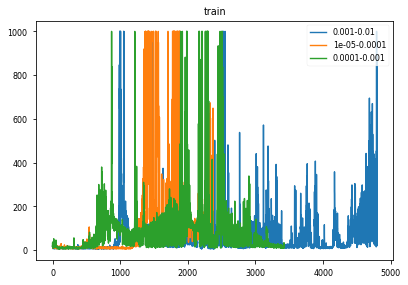

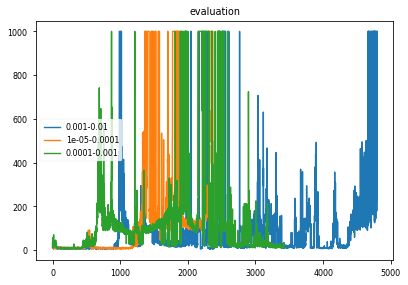

In [205]:
dir_name = 'learningrates'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

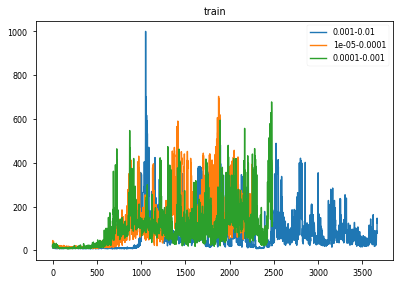

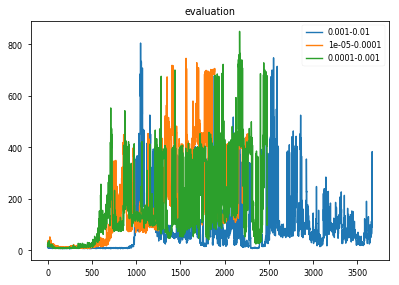

In [206]:
plot_rewards(load_rewards_mean(dir_name).items())

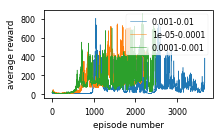

In [207]:
save_plot(load_rewards_mean(dir_name).items(), 'learningrate.pdf')

# Gammas

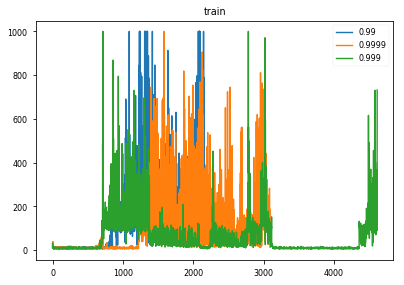

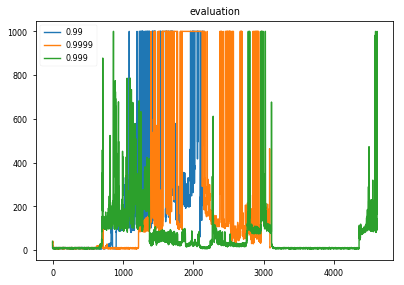

In [208]:
dir_name = 'gammas'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

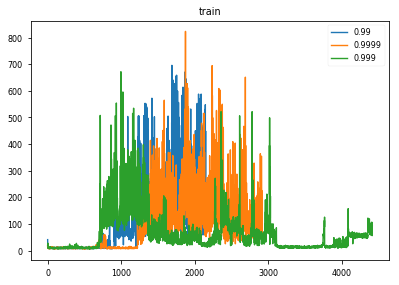

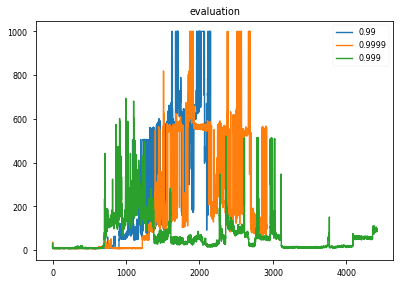

In [209]:
plot_rewards(load_rewards_mean(dir_name).items())

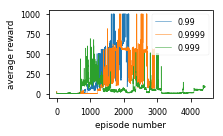

In [210]:
save_plot(load_rewards_mean(dir_name).items(), 'gamma.pdf')

# Taus

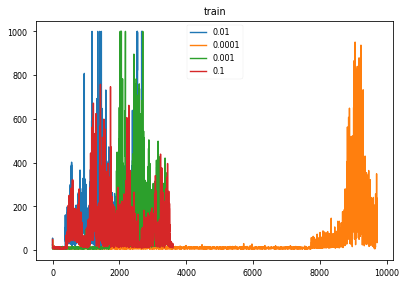

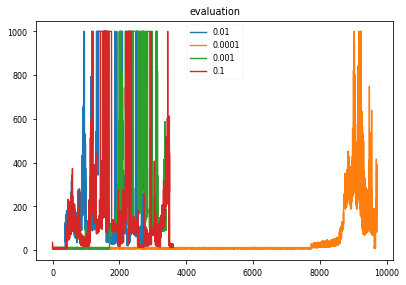

In [211]:
dir_name = 'taus'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

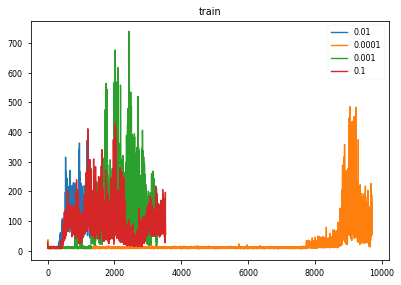

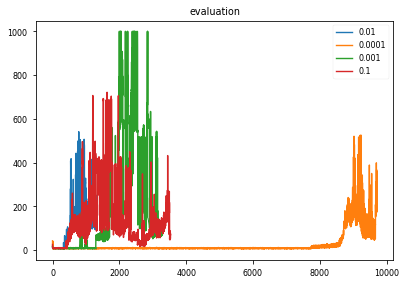

In [212]:
plot_rewards(load_rewards_mean(dir_name).items())

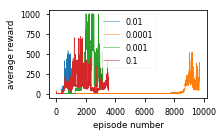

In [213]:
save_plot(load_rewards_mean(dir_name).items(), 'tau.pdf')

# Memory Size

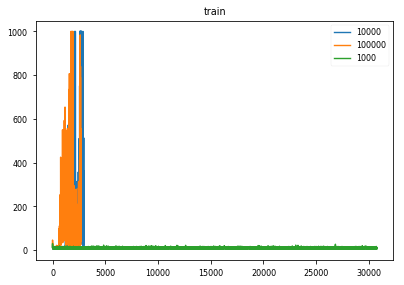

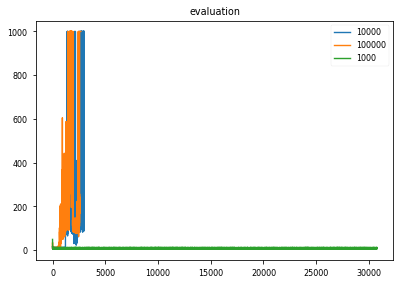

In [214]:
dir_name = 'replay_sizes'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

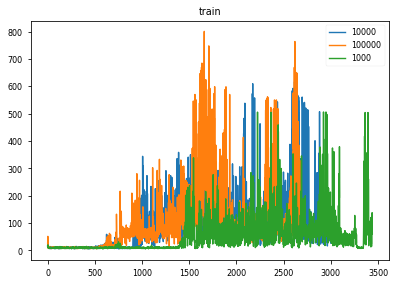

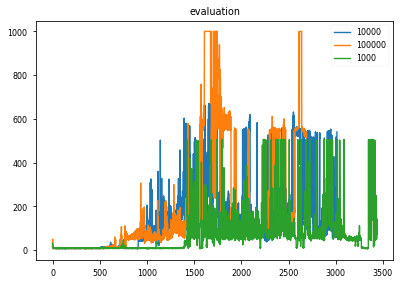

In [215]:
plot_rewards(load_rewards_mean(dir_name).items())

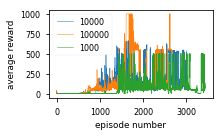

In [216]:
save_plot(load_rewards_mean(dir_name).items(), 'memory.pdf')

# Ant baseline

In [49]:
df = pd.read_csv('../pendulum/rewards.csv')

In [50]:
df.head()

train  evaluation
0   12.0        27.0
1   19.0        19.0
2   36.0        22.0
3   18.0        13.0
4   32.0        11.0

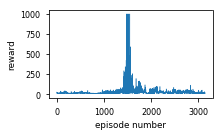

In [51]:
plt.figure(figsize=(3.2,2))
plt.plot(df[['evaluation']], lw=0.5)
plt.xlabel('episode number')
plt.ylabel('reward')
plt.tight_layout()
plt.savefig('ant.pdf', bbox_inches='tight')

In [45]:
df_losses = pd.read_csv('./ant/losses.csv')

In [46]:
df_losses.head()

critic     actor
0  0.106768  0.107047
1  0.109173  0.056112
2  0.103740  0.028285
3  0.106545  0.007867
4  0.105110 -0.007619

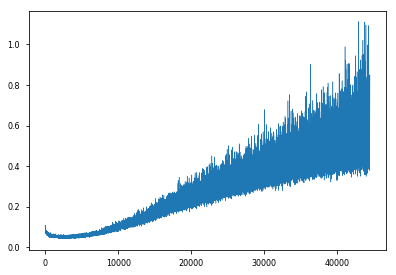

In [47]:
plt.plot(df_losses[['critic']], lw=0.5)

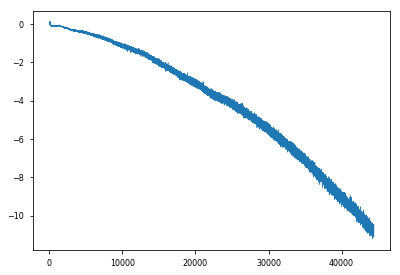

In [48]:
plt.plot(df_losses[['actor']], lw=0.5)